**Your Name: Derek Rogers**

In [57]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [58]:
# Assuming your data file is in the same directory as this Python file
data_dir = os.getcwd()

# Name of your CSV file
csv_file = 'unique_m.csv'

# Read the data from the CSV file into a pandas DataFrame
file_path = os.path.join(data_dir, csv_file)
df = pd.read_csv(file_path)

In [59]:
# Calculate the sum of values in each column excluding the last two columns
column_sums = df.iloc[:, :-2].sum()

# Identify columns with all zero values
zero_sum_columns = column_sums[column_sums == 0].index

# Print the names of columns being removed
print("Columns with all zero values being removed:")
print(zero_sum_columns)

# Drop columns with all zero values
df = df.drop(columns=zero_sum_columns)

# Sort columns by their sum values in descending order after excluding zero-sum columns
sorted_columns = column_sums.drop(index=zero_sum_columns).sort_values(ascending=False)

Columns with all zero values being removed:
Index(['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn'], dtype='object')


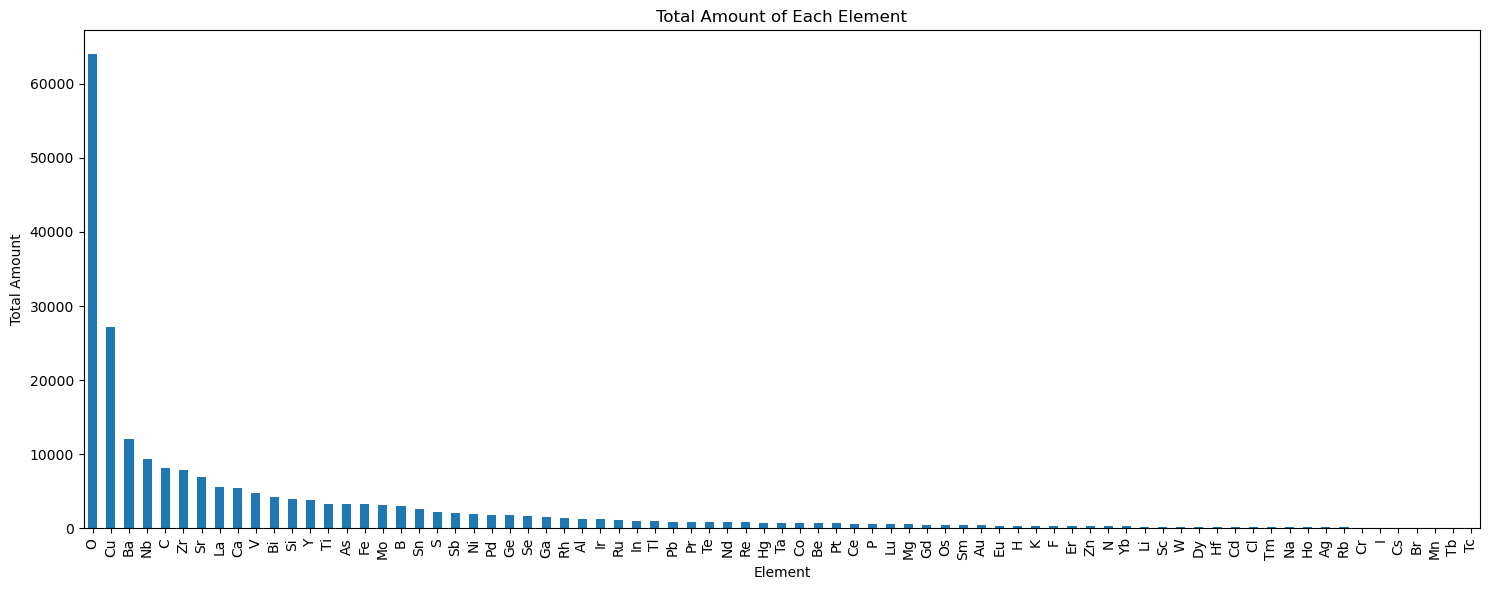

In [60]:
# Create a bar chart visualizing the sum values
sorted_columns.plot(kind='bar', figsize=(15, 6))

# Add labels and title
plt.xlabel('Element')
plt.ylabel('Total Amount')
plt.title('Total Amount of Each Element')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

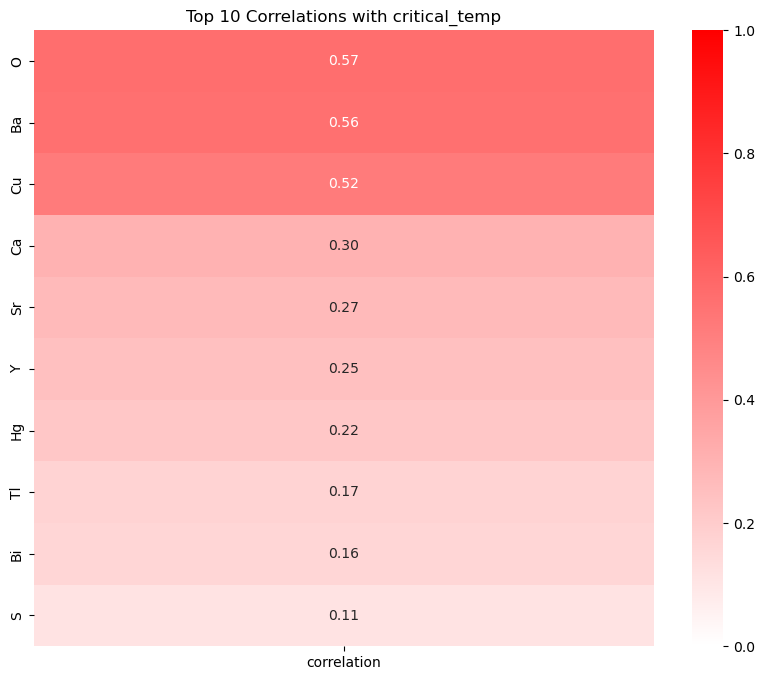

In [62]:
# Calculate the correlation matrix between 'critical_temp' and other columns
correlation_matrix = df.corrwith(df['critical_temp'])

# Remove the correlation of 'critical_temp' with itself
correlation_matrix = correlation_matrix.drop('critical_temp')

# Get the top 10 highest correlations
top_correlations = correlation_matrix.abs().nlargest(10)

# Create a custom colormap going from white to red with increasing correlation
cmap = mcolors.LinearSegmentedColormap.from_list("WhiteRed", [(1, 1, 1), (1, 0, 0)])

# Create a heatmap with adjusted color scale
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(top_correlations, columns=['correlation']),
            annot=True, cmap=cmap, fmt=".2f", vmin=0, vmax=1)
plt.title('Top 10 Correlations with critical_temp')
plt.show()


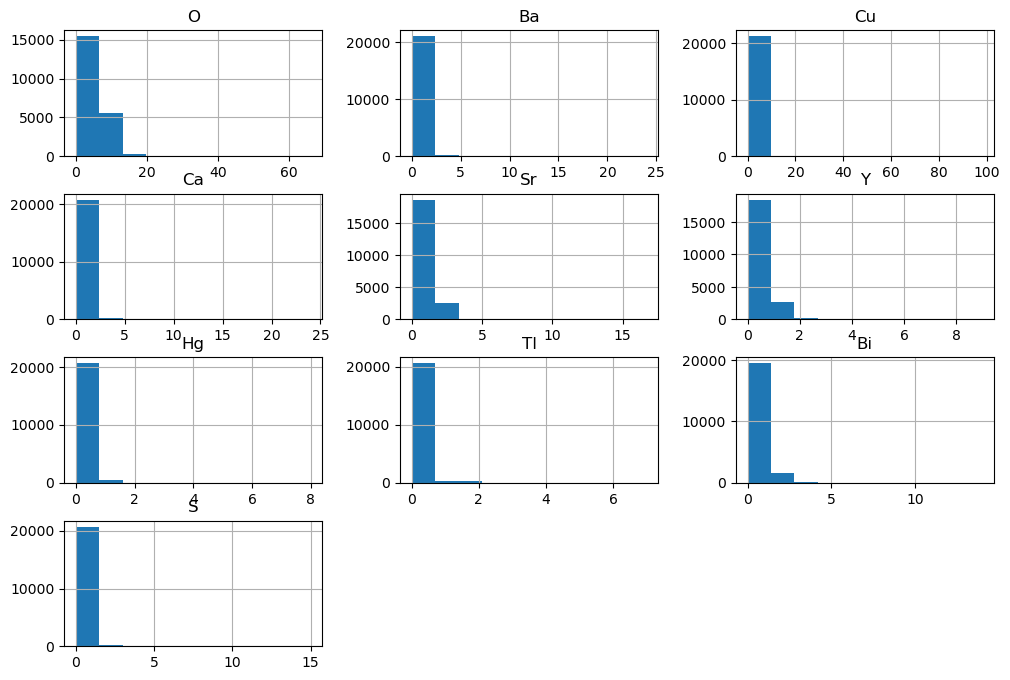

In [ ]:
# Calculate the correlation matrix between 'critical_temp' and other columns
correlation_matrix = df.corrwith(df['critical_temp'])

# Remove the correlation of 'critical_temp' with itself
correlation_matrix = correlation_matrix.drop('critical_temp')

# Get the top 10 highest correlations
top_correlations = correlation_matrix.abs().nlargest(10)

# Select columns with the top 10 highest correlations
top_columns = top_correlations.index

# Create histograms for the top 10 correlated numeric columns
numeric_columns = df[top_columns]
numeric_columns.hist(figsize=(12, 8))
plt.title('Histograms for Top 10 Correlated Numeric Columns with critical_temp')
plt.show()


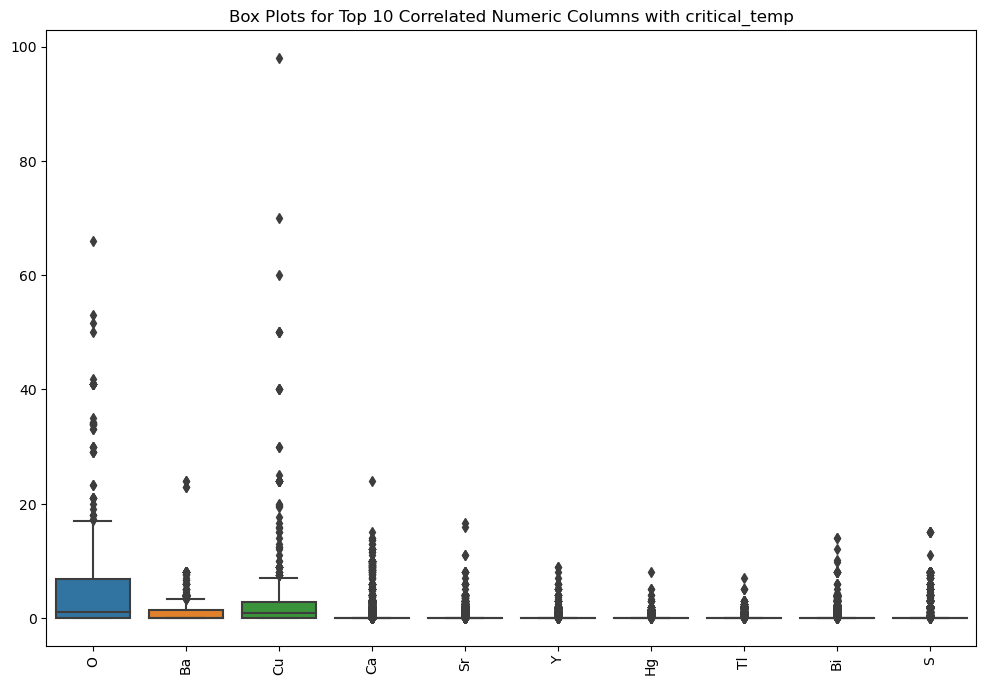

In [ ]:
# Calculate the correlation matrix between 'critical_temp' and other columns
correlation_matrix = df.corrwith(df['critical_temp'])

# Remove the correlation of 'critical_temp' with itself
correlation_matrix = correlation_matrix.drop('critical_temp')

# Get the top 10 highest correlations
top_correlations = correlation_matrix.abs().nlargest(10)

# Select columns with the top 10 highest correlations
top_columns = top_correlations.index

# Create box plots for the top 10 correlated numeric columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[top_columns])
plt.xticks(rotation=90)
plt.title('Box Plots for Top 10 Correlated Numeric Columns with critical_temp')
plt.show()